In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chisquare, chi2_contingency, f_oneway
from statsmodels.formula.api import ols
from pingouin import pairwise_tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.lines import Line2D
from tqdm import tqdm_notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.style.use('classic')
%matplotlib inline

def autolabel(rects,margin_left=2.5,fontsize=10):
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_width()-margin_left, 
                 rect.get_y()+0.5*rect.get_height(),
                 f'{round(width,2)}%',
                 color='k',
#                  backgroundcolor='white',
                 fontsize=fontsize,
                 ha='center', 
                 va='center')
        
reasons_a_df = pd.read_csv('./StudyA/StudyA_Reasons_Values.csv')
reasons_b_df = pd.read_csv('./StudyB/StudyB_Reasons_Values.csv')

__author__ = 'HK Dambanemuya'
__version__ = 'Python Interactive'

## Chi-Squared

In [2]:
obs = np.array([[329, 253], [322, 293]]).T
result = chisquare(obs, axis=None, ddof=1)

print(f'''Our findings show that observing simultaneously two projects lowered the percentage of selecting
high treatment condition projects in experiment 2 (52.4\%) compared to experiment 1 (56.5\%) 
across all project categories ($\chi^2(1,N=1197) = {round(result[0],2)}, p<{round(result[1],3)}$). 

Therefore, basic competition between projects has a small effect ($\phi={round(np.sqrt(np.true_divide(result[0],1197)),4)}$) on crowd signals.''')

Our findings show that observing simultaneously two projects lowered the percentage of selecting
high treatment condition projects in experiment 2 (52.4\%) compared to experiment 1 (56.5\%) 
across all project categories ($\chi^2(1,N=1197) = 11.97, p<0.003$). 

Therefore, basic competition between projects has a small effect ($\phi=0.1$) on crowd signals.


## ANOVA

In [3]:
print ("------------------------Study A---------------------------")
for variable in ['altruism', 'ssi', 'interest']:
    F, p = stats.f_oneway(reasons_a_df[(reasons_a_df['labels']=='H')][variable].values,
                          reasons_a_df[(reasons_a_df['labels']=='L')][variable].values,
                          reasons_a_df[(reasons_a_df['labels']=='O')][variable].values,
                          reasons_a_df[(reasons_a_df['labels']=='R')][variable].values
                           )
    print (f'{variable}: F={round(F,3)}, p={round(p,3)}')
    
for variable in ['ssi', 'altruism', 'interest']:
    
    # perform multiple pairwise comparison (Tukey HSD)
    # for unbalanced (unequal sample size) data, pairwise_tukey uses Tukey-Kramer test
    m_comp = pairwise_tukey(data=reasons_a_df, dv=variable, between='labels')
    m_comp.columns = ['group1', 'group2', 'mean(group1)', 'mean(group2)', 'diff', 'se', 'T', 'p-tukey', 'hedges' ]
    
    
#     tukey = pairwise_tukeyhsd(endog=reasons_a_df[variable],
#                               groups=reasons_a_df['labels'],
#                               alpha=0.05)
    #display results
    print(f'------------------------{variable.upper()}---------------------------')
#     print(tukey)
    print (m_comp)
    
print ("\n------------------------Study B---------------------------")
for variable in ['altruism', 'ssi', 'interest']:
    F, p = stats.f_oneway(reasons_b_df[(reasons_b_df['labels']=='H')][variable].values,
                          reasons_b_df[(reasons_b_df['labels']=='L')][variable].values,
                          reasons_b_df[(reasons_b_df['labels']=='O')][variable].values,
                          reasons_b_df[(reasons_b_df['labels']=='R')][variable].values
                           )
    print (f'{variable}: F={round(F,3)}, p={round(p,3)}')

for variable in ['ssi', 'altruism', 'interest']:
    # perform multiple pairwise comparison (Tukey HSD)
    # for unbalanced (unequal sample size) data, pairwise_tukey uses Tukey-Kramer test
    m_comp = pairwise_tukey(data=reasons_b_df, dv=variable, between='labels')
    m_comp.columns = ['group1', 'group2', 'mean(group1)', 'mean(group2)', 'diff', 'se', 'T', 'p-tukey', 'hedges' ]
    
    #display results
    print(f'------------------------{variable.upper()}---------------------------')
    print (m_comp)

------------------------Study A---------------------------
altruism: F=8.246, p=0.0
ssi: F=29.731, p=0.0
interest: F=5.845, p=0.001
------------------------SSI---------------------------
  group1 group2  mean(group1)  mean(group2)    diff    se      T  p-tukey  hedges
0  H      L     31.434        34.264        -2.830  1.439 -1.967 0.201    -0.205 
1  H      O     31.434        44.202        -12.768 1.606 -7.949 0.001    -0.922 
2  H      R     31.434        26.372        5.062   1.787 2.833  0.024    0.366  
3  L      O     34.264        44.202        -9.938  1.778 -5.591 0.001    -0.717 
4  L      R     34.264        26.372        7.892   1.942 4.064  0.001    0.569  
5  O      R     44.202        26.372        17.830  2.069 8.617  0.001    1.285  
------------------------ALTRUISM---------------------------
  group1 group2  mean(group1)  mean(group2)   diff    se      T  p-tukey  hedges
0  H      L     37.926        36.431        1.495  1.329 1.125  0.789    0.117  
1  H      O     3

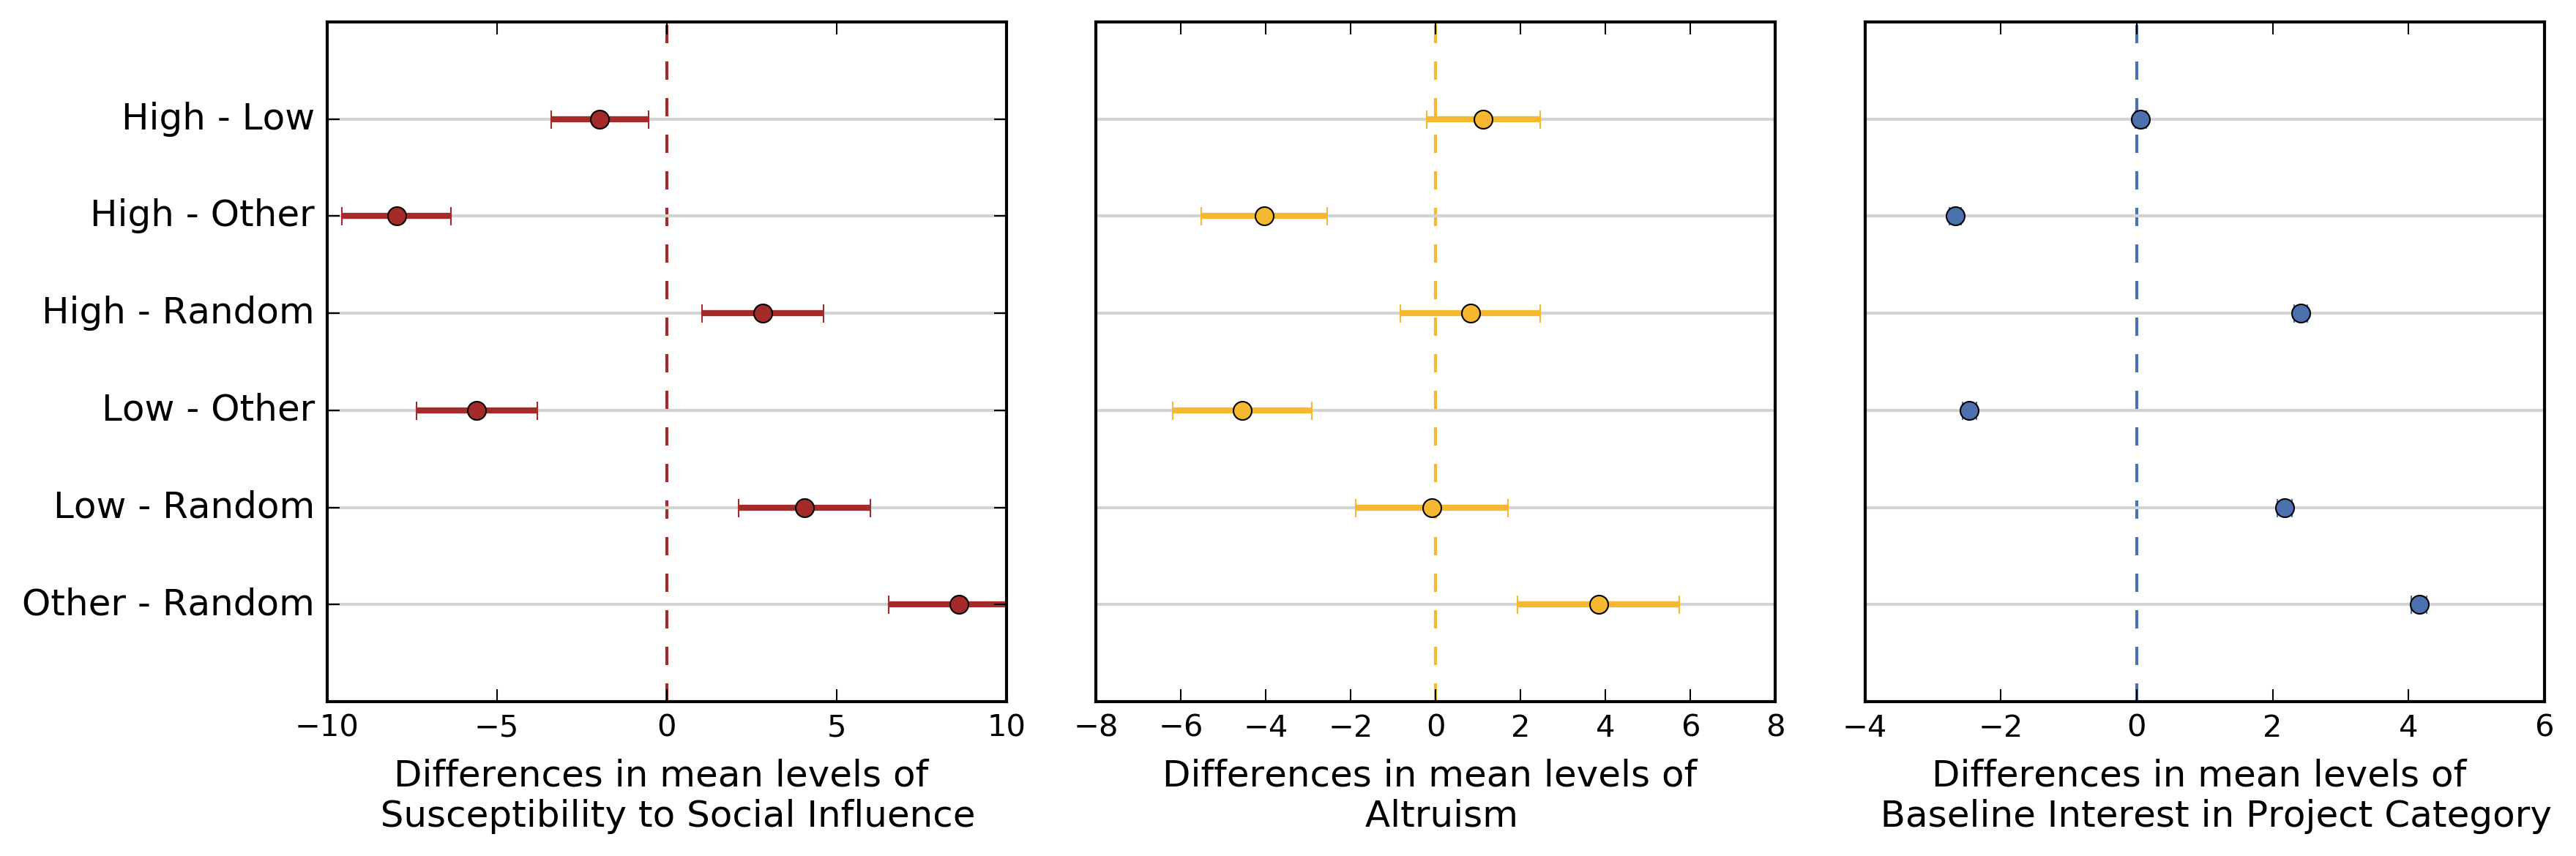

In [4]:
## Study A

fig = plt.figure(figsize=(12,4), dpi=300)

lnwdth = 2
marker = 'o'
colors = ['brown', '#F6B731', '#4B72AF']
lower = [-10,-8, -4]
upper= [10, 8,6]
titles = ["Differences in mean levels of \n  Susceptibility to Social Influence",
          "Differences in mean levels of \n Altruism",
          "Differences in mean levels of \n  Baseline Interest in Project Category"]

for i, measure in enumerate(['ssi', 'altruism', 'interest']):
    ax = plt.subplot(1, 3, i+1)
    ax = plt.vlines(0, 0, 1000, colors=colors[i], linestyles='dashed')
    m_comp = pairwise_tukey(data=reasons_a_df, dv=measure, between='labels')
    m_comp.columns = ['group1', 'group2', 'mean(group1)', 'mean(group2)', 'diff', 'se', 'T', 'p-tukey', 'hedges' ]
    for j in range(6):
        ax = plt.hlines(j+1,lower[i],upper[i], color='#D3D3D3', linestyles='solid')
    for idx, row in m_comp.iterrows():
        plt.errorbar(x=row['T'], y=6-idx, xerr=row['se'], fmt=marker, linewidth=lnwdth, c=colors[i]) # H - L
    plt.ylim(0,7)
    plt.xlim(lower[i],upper[i])
    plt.xlabel(titles[i], fontsize=12)
    if i==0:
        plt.yticks(np.arange(7), ('', 'Other - Random', 'Low - Random', 'Low - Other', 'High - Random', 'High - Other', 'High - Low'), fontsize=12)
    else:
        plt.yticks([])
plt.tight_layout()

plt.show()


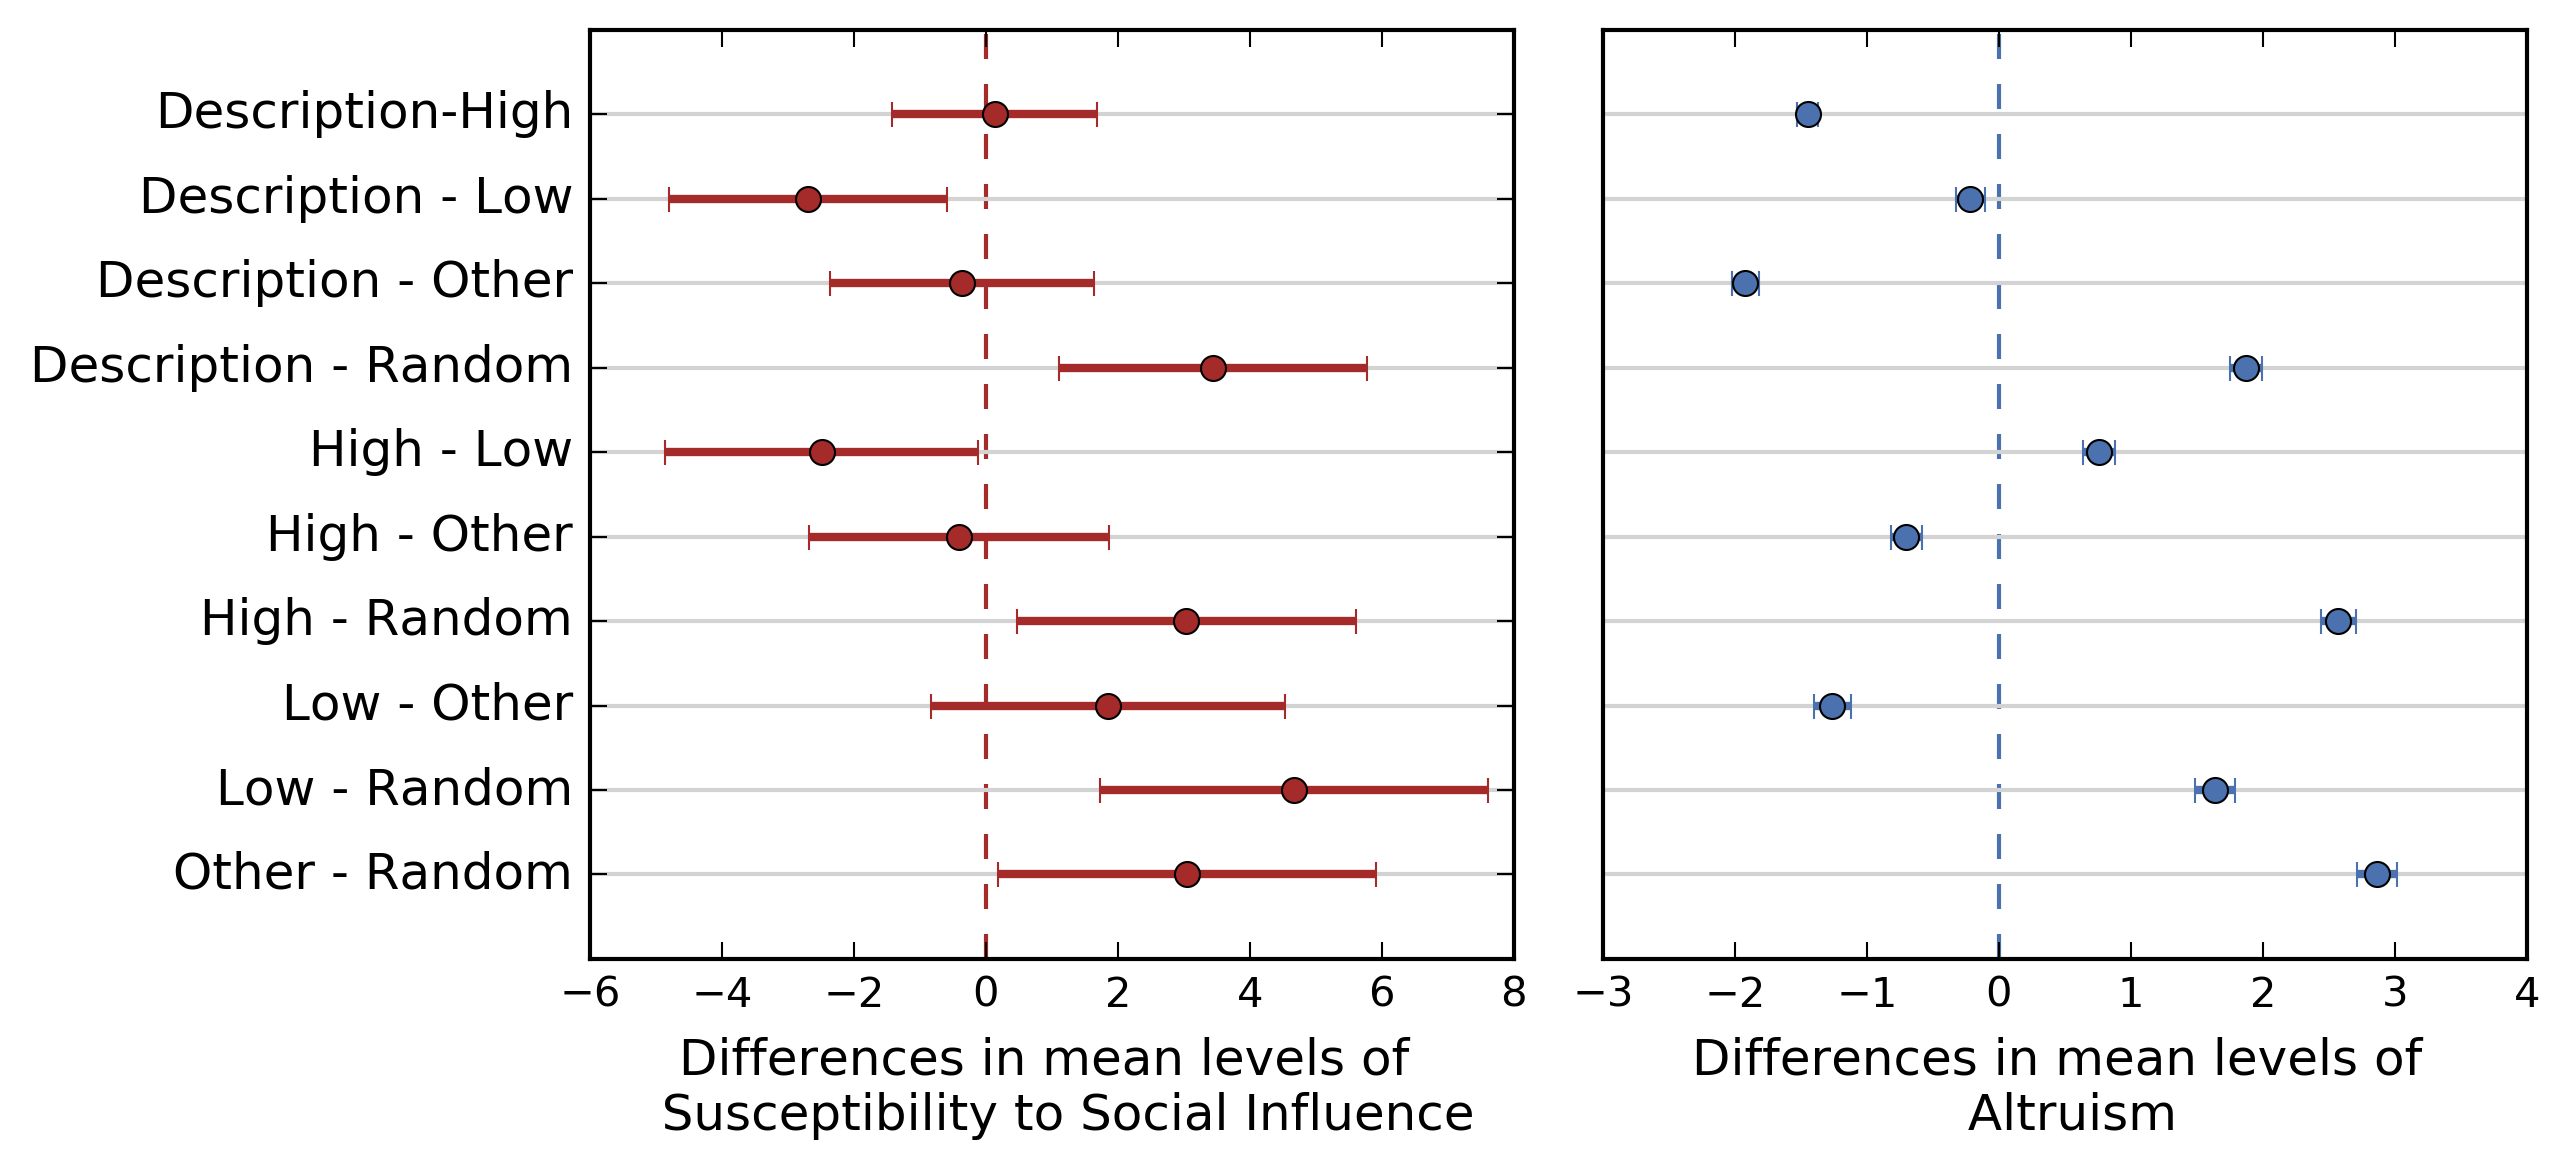

In [5]:
## Study A

fig = plt.figure(figsize=(12,4), dpi=300)

lnwdth = 2
marker = 'o'
colors = ['brown','#4B72AF']
lower = [-6,-3]
upper= [8,4]
titles = ["Differences in mean levels of \n  Susceptibility to Social Influence",
          "Differences in mean levels of \n Altruism",
          "Differences in mean levels of \n  Baseline Interest in Project Category"]

for i, measure in enumerate(['ssi', 'interest']):
    ax = plt.subplot(1, 3, i+1)
    ax = plt.vlines(0, 0, 1000, colors=colors[i], linestyles='dashed')
    m_comp = pairwise_tukey(data=reasons_b_df, dv=measure, between='labels')
    m_comp.columns = ['group1', 'group2', 'mean(group1)', 'mean(group2)', 'diff', 'se', 'T', 'p-tukey', 'hedges' ]
    for j in range(10):
        ax = plt.hlines(j+1,lower[i],upper[i], color='#D3D3D3', linestyles='solid')
    for idx, row in m_comp.iterrows():
        plt.errorbar(x=row['T'], y=10-idx, xerr=row['se'], fmt=marker, linewidth=lnwdth, c=colors[i]) # H - L
    plt.ylim(0,11)
    plt.xlim(lower[i],upper[i])
    plt.xlabel(titles[i], fontsize=12)
    if i==0:
        plt.yticks(np.arange(11), ('', 'Other - Random', 'Low - Random', 'Low - Other', 
                                   'High - Random', 'High - Other', 'High - Low', 
                                   'Description - Random', 'Description - Other',
                                   'Description - Low', 'Description-High'), 
                   fontsize=12)
    else:
        plt.yticks([])
plt.tight_layout()

plt.show()


### Figure 4

H   43.986
L   24.742
O   17.869
R   13.402
Name: labels, dtype: float64 D   55.019
H   18.959
O   10.037
L   8.922 
R   7.063 
Name: labels, dtype: float64


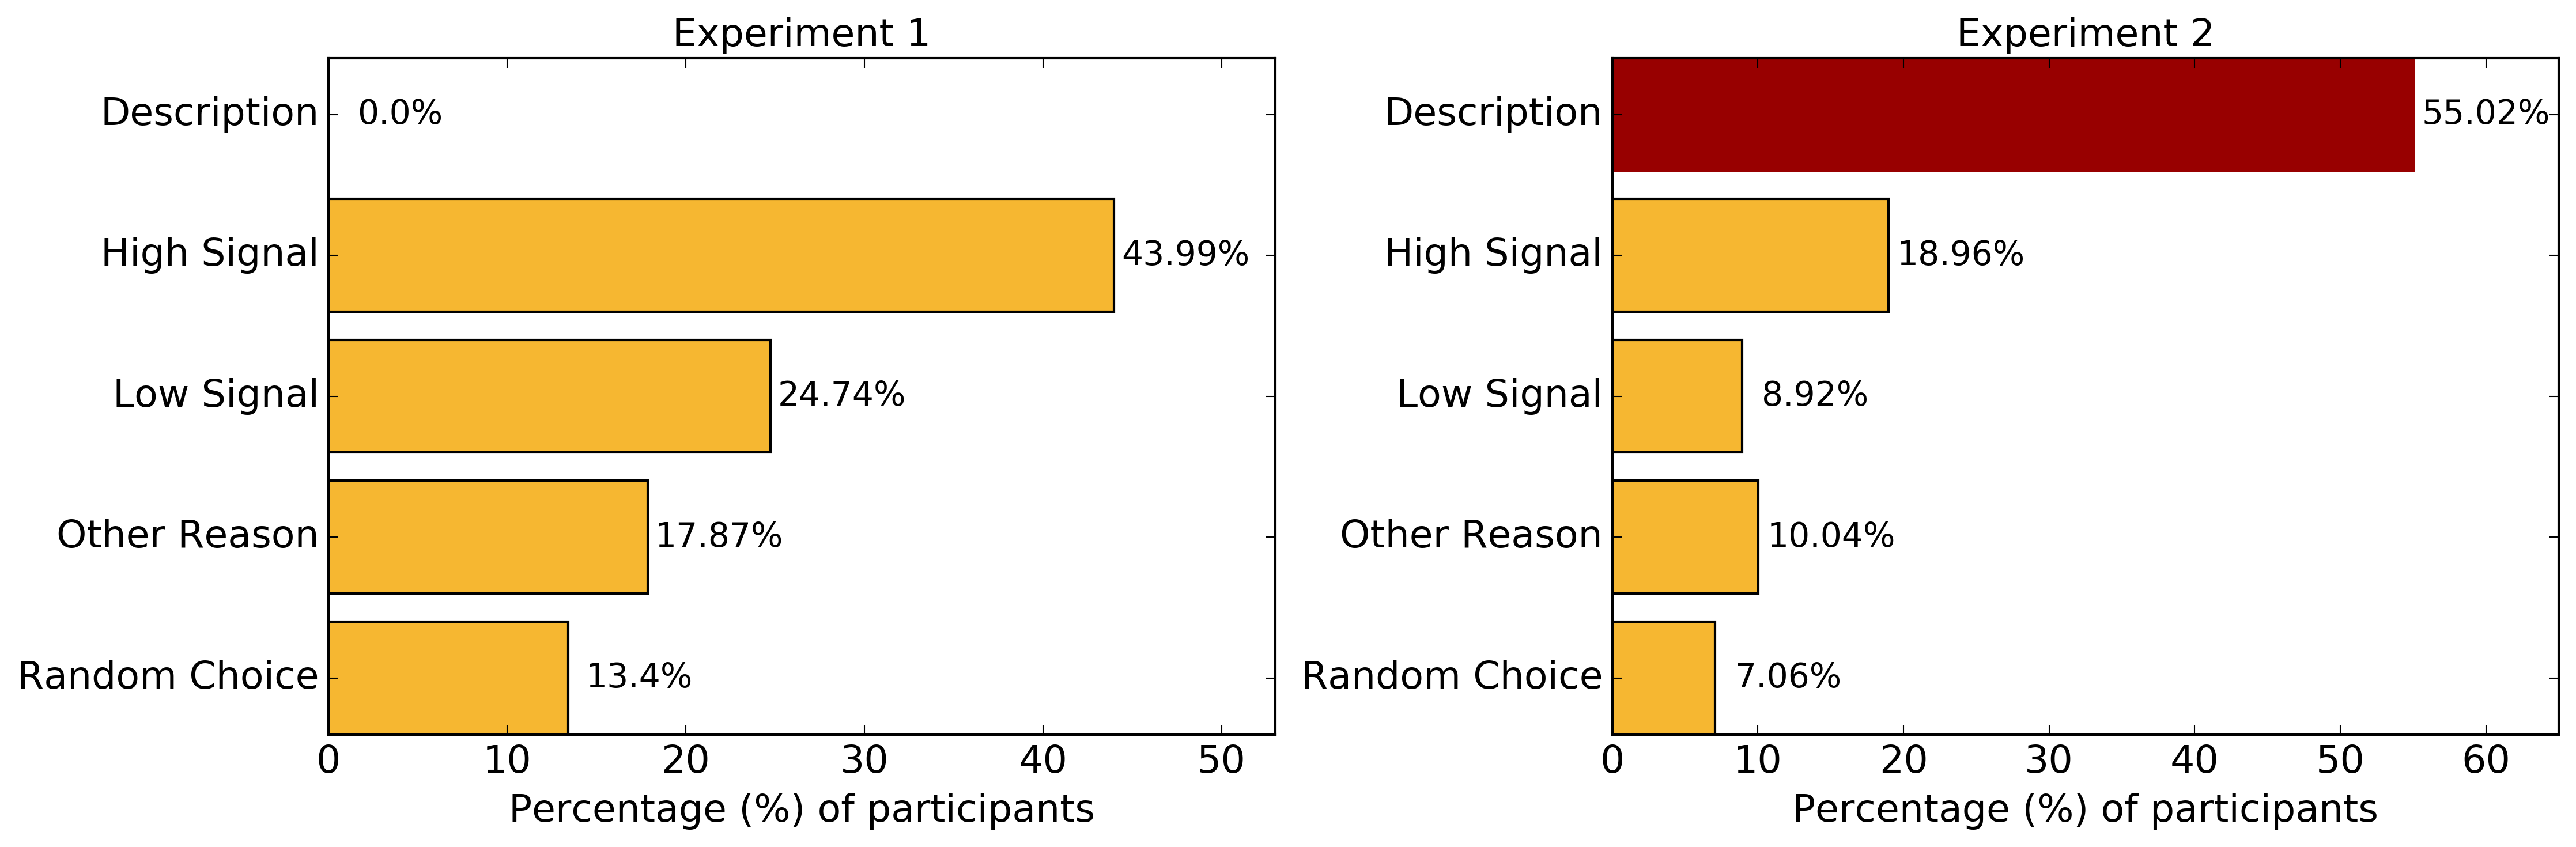

In [6]:
print ((reasons_a_df.labels.value_counts()/sum(reasons_a_df.labels.value_counts())*100), (reasons_b_df.labels.value_counts()/sum(reasons_b_df.labels.value_counts())*100))

fig = plt.figure(figsize=(15,5), dpi=300)
s = 16
ax = plt.subplot(1, 2, 1)
values_a = [value for value in (reasons_a_df.labels.value_counts()/sum(reasons_a_df.labels.value_counts())*100).sort_values(ascending=True)]
values_a.append(0)

plot1 = plt.barh(['Random Choice', 'Other Reason', 'Low Signal', 'High Signal', 'Description'],
                 values_a,
                 color='#F6B731')
autolabel(plot1,margin_left=-4, fontsize=14)
plt.xlim(0,53)
plt.xlabel('Percentage (%) of participants', fontsize=s)
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.title('Experiment 1', fontsize=s)

ax = plt.subplot(1, 2, 2)

values_b = [(reasons_b_df.labels.value_counts()/sum(reasons_b_df.labels.value_counts())*100)[key] for key in reversed(['D', 'H', 'L','O', 'R'])]

plot2 = plt.barh(['Random Choice', 'Other Reason', 'Low Signal', 'High Signal', 'Description'],
                 values_b,
                 color='#F6B731')
plot2[-1].set_color('#980000')
autolabel(plot2, margin_left=-5, fontsize=14)
plt.xlim(0,65)
plt.xlabel('Percentage (%) of participants', fontsize=s)
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.title('Experiment 2', fontsize=s)
plt.tight_layout()
plt.show()

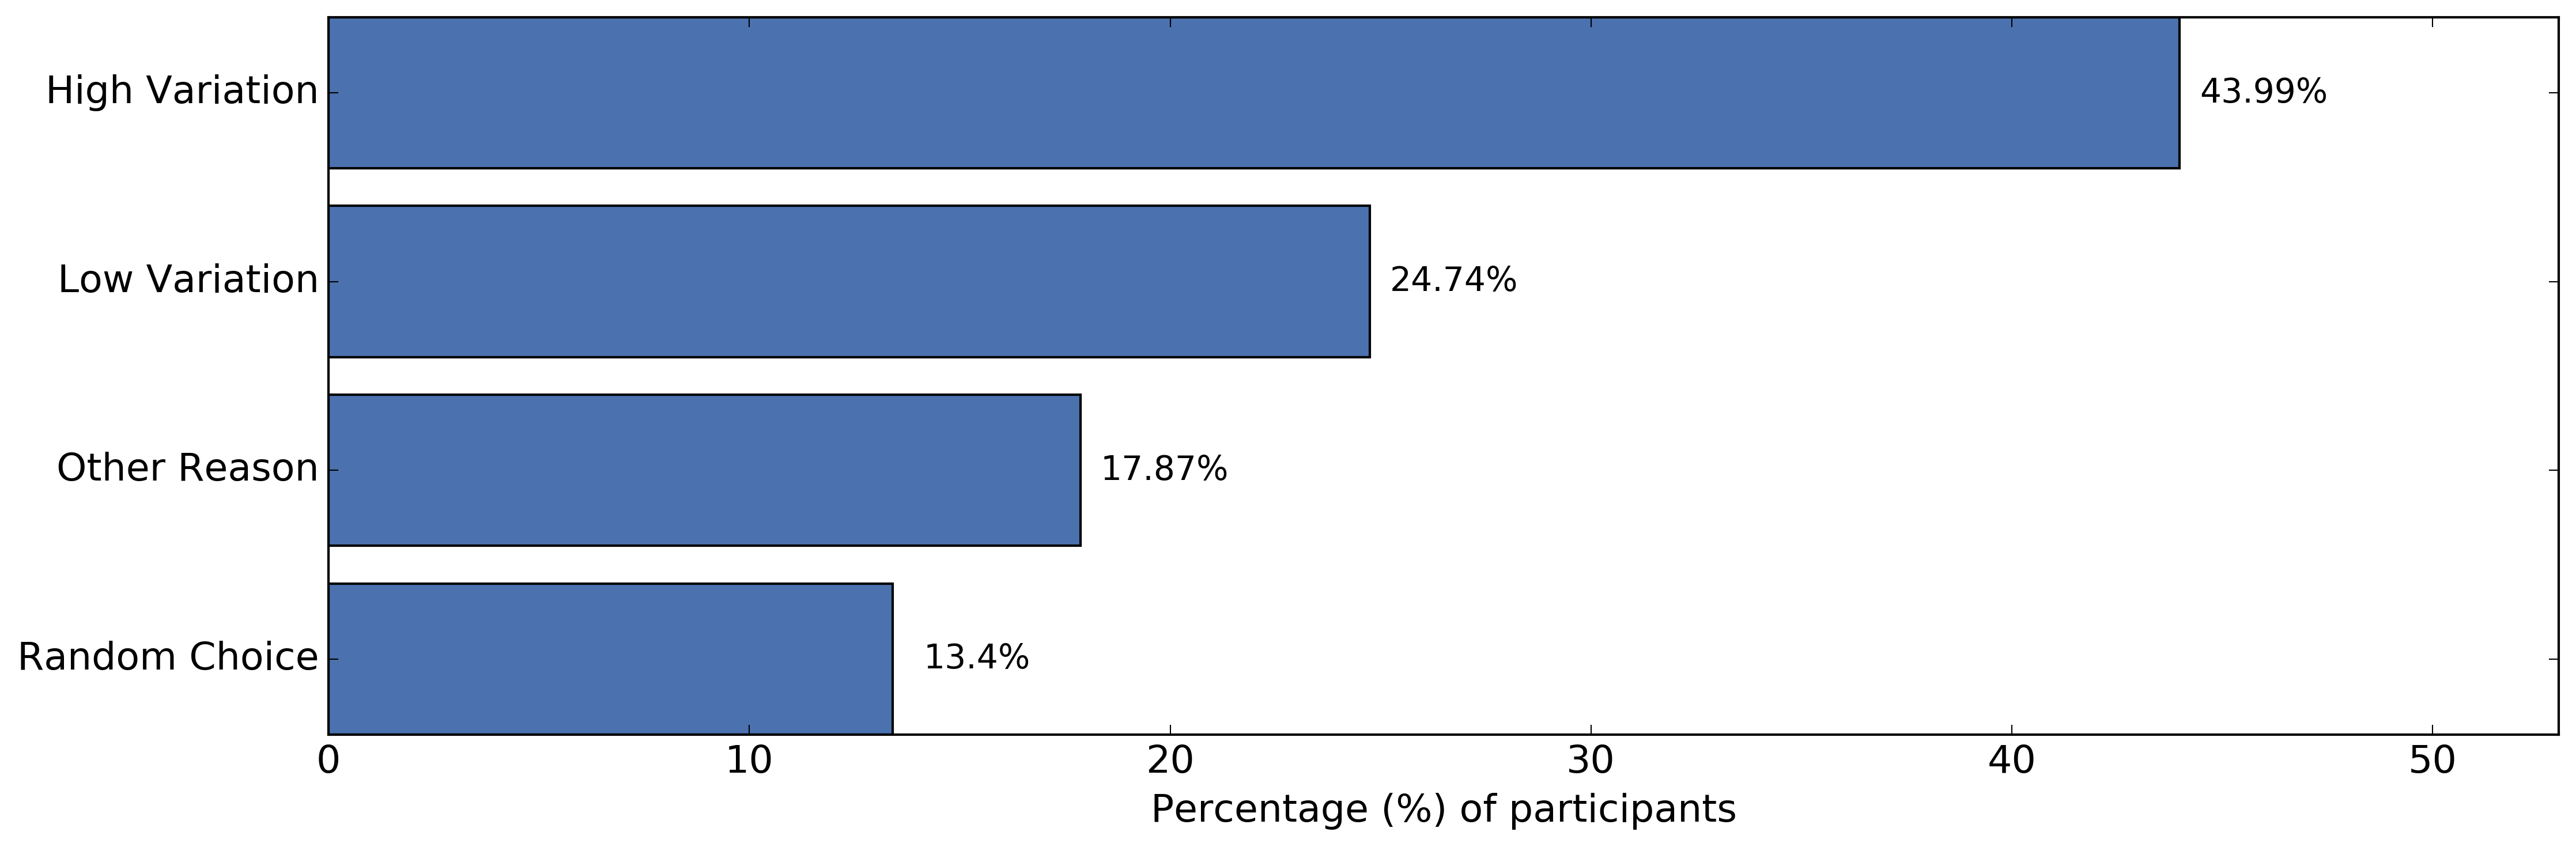

In [7]:
# print ((reasons_a_df.labels.value_counts()/sum(reasons_a_df.labels.value_counts())*100), (reasons_b_df.labels.value_counts()/sum(reasons_b_df.labels.value_counts())*100))

fig = plt.figure(figsize=(15,5), dpi=300)
s = 16
ax = plt.subplot(1, 1, 1)
values_a = [value for value in (reasons_a_df.labels.value_counts()/sum(reasons_a_df.labels.value_counts())*100).sort_values(ascending=True)]
# values_a.append(0)

plot1 = plt.barh(['Random Choice', 'Other Reason', 'Low Variation', 'High Variation'],
                 values_a,
                 color='#4B72AF')
autolabel(plot1,margin_left=-2, fontsize=14)
plt.xlim(0,53)
plt.xlabel('Percentage (%) of participants', fontsize=s)
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
# plt.title('Experiment 1', fontsize=s)

plt.tight_layout()
plt.show()

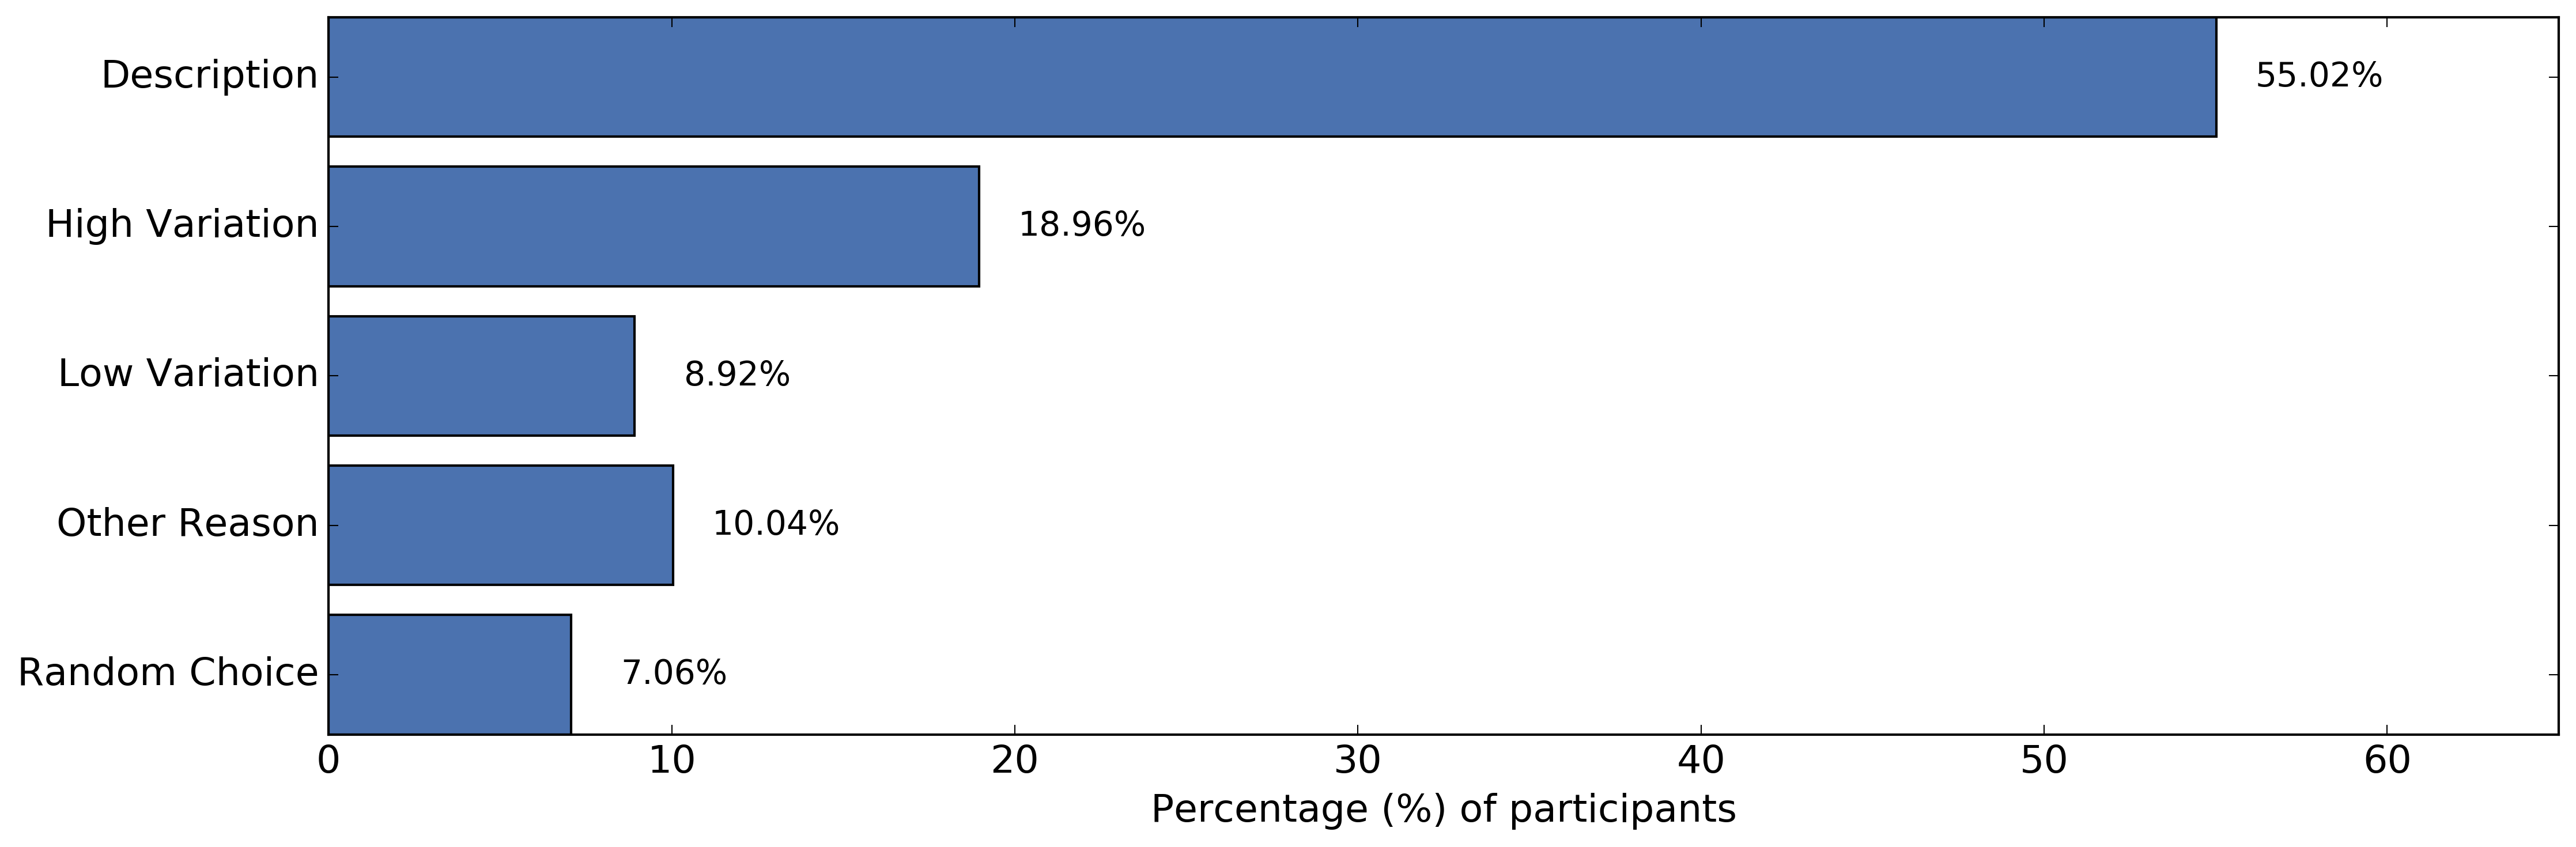

In [8]:
# print ((reasons_a_df.labels.value_counts()/sum(reasons_a_df.labels.value_counts())*100), (reasons_b_df.labels.value_counts()/sum(reasons_b_df.labels.value_counts())*100))

fig = plt.figure(figsize=(15,5), dpi=300)
s = 16
ax = plt.subplot(1, 1, 1)

values_b = [(reasons_b_df.labels.value_counts()/sum(reasons_b_df.labels.value_counts())*100)[key] for key in reversed(['D', 'H', 'L','O', 'R'])]

plot2 = plt.barh(['Random Choice', 'Other Reason', 'Low Variation', 'High Variation', 'Description'],
                 values_b,
                 color='#4B72AF')
autolabel(plot2, margin_left=-3, fontsize=14)
plt.xlim(0,65)
plt.xlabel('Percentage (%) of participants', fontsize=s)
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
# plt.title('Experiment 2', fontsize=s)
plt.tight_layout()
plt.show()

In [9]:
43.99+24.74+17.87+13.4

100.00000000000001

In [10]:
55.02+18.96+8.92+10.04+7.06

100.0